In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [10]:
disaster_csv = 'data\disaster_final.csv'
sp_csv = 'data\s&pfinal.csv'

disaster_df = pd.read_csv(disaster_csv)
sp_df = pd.read_csv(sp_csv)

In [11]:
#check data
disaster_df.head()

,Year,Natural,Technological
0,1987,11,10
1,1988,22,4
2,1989,19,16
3,1990,24,8
4,1991,36,10


In [93]:
#check data
sp_df

,Year,SP500,Consumer Price Index
0,1987,286.84,113.62
1,1988,265.78,118.26
2,1989,322.83,123.97
3,1990,334.59,130.66
4,1991,376.18,136.19
5,1992,415.74,140.32
6,1993,451.41,144.46
7,1994,460.33,148.23
8,1995,541.64,152.38
9,1996,670.83,156.85


In [13]:
#merge the two dataframes into one
new_merged = pd.merge(disaster_df, sp_df, on="Year")
new_merged.head()

,Year,Natural,Technological,SP500,Consumer Price Index
0,1987,11,10,286.84,113.62
1,1988,22,4,265.78,118.26
2,1989,19,16,322.83,123.97
3,1990,24,8,334.59,130.66
4,1991,36,10,376.18,136.19


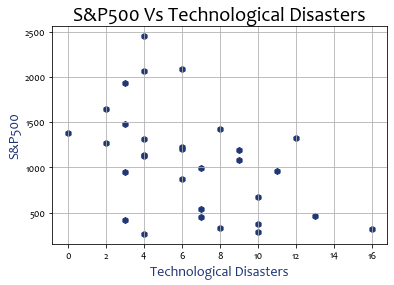

In [80]:
#check for linearity technical disasters

fig, ax = plt.subplots()
plt.scatter(new_merged['Technological'],new_merged['SP500'],color='#203776',marker="h")
plt.title('S&P500 Vs Technological Disasters',fontsize=20)
plt.xlabel('Technological Disasters',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.show()

fig.savefig('SP500_Technological.png',dpi=300)

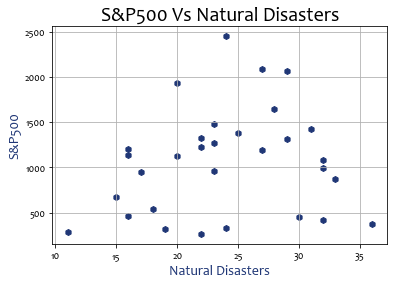

In [81]:
#check for linearity natural disasters

fig, ax = plt.subplots()
plt.scatter(new_merged['Natural'],new_merged['SP500'],color='#203776',marker="h")
plt.title('S&P500 Vs Natural Disasters',fontsize=20)
plt.xlabel('Natural Disasters',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.show()

fig.savefig('SP500_Natural.png',dpi=300)

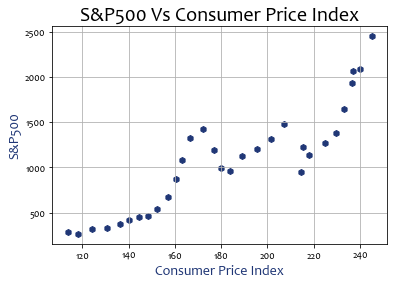

In [82]:
#check for linearity consumer price index

fig, ax = plt.subplots()
plt.scatter(new_merged['Consumer Price Index'],new_merged['SP500'],color='#203776',marker="h")
plt.title('S&P500 Vs Consumer Price Index',fontsize=20)
plt.xlabel('Consumer Price Index',color='#203776',fontsize=14)
plt.ylabel('S&P500',color='#203776',fontsize=14)
plt.grid(True)
plt.rcParams["font.family"] = "candara"
plt.show()

fig.savefig('SP500_CPI.png',dpi=300)

In [100]:
#sklearn output for intercept and coefficients for each x dependent variable

X = new_merged[['Natural','Technological','Consumer Price Index']] # 3 variables for multiple regression
y = new_merged['SP500']
 
# with sklearn fit the model with all of x dependent variables or features
regr = linear_model.LinearRegression()
regr.fit(X, y)

model = LinearRegression()
model.fit(X,y)
score = model.score(X,y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)
print('R2 Score: ', score)

Intercept:  -2172.190817635239
Coefficients:  [13.70887502 32.69370455 14.82384626]
R2 Score:  0.8480519201928153


In [61]:
#Create a prediction with sklearn

july2020cpi = 259.101
tech20disasters = 6
natural20disasters = 25

print ('Predicted S&P500: ', regr.predict([[natural20disasters ,tech20disasters, july2020cpi]]))

Predicted S&P500:  [2207.56667452]


In [68]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     50.23
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           3.54e-11
Time:                        00:44:21   Log-Likelihood:                -211.61
No. Observations:                  31   AIC:                             431.2
Df Residuals:                      27   BIC:                             436.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2172.1908 

Final formula is:

$SP500$ = $-2172.19$ + $13.70*Natural$ + $32.69*Technological$ + $14.82*ConsumerPriceIndex$

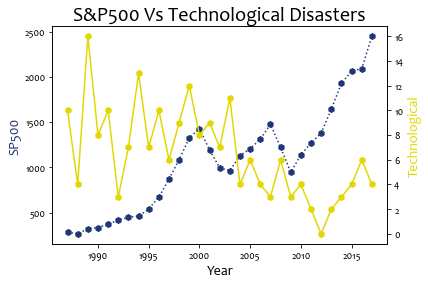

In [87]:
#Create a linechart to visualize overtime changes between Tech Disasters vs SP500
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(new_merged['Year'], new_merged['SP500'], color="#203776", marker="h",linestyle='dotted')
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("SP500",color="#203776",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(new_merged['Year'], new_merged['Technological'],color="#E2D800",marker="h")
ax2.set_ylabel("Technological",color="#E2D800",fontsize=14)
plt.title('S&P500 Vs Technological Disasters',fontsize=20)
plt.rcParams["font.family"] = "candara"
plt.show()

# save file
fig.savefig('linechart_tech.png',dpi=300)

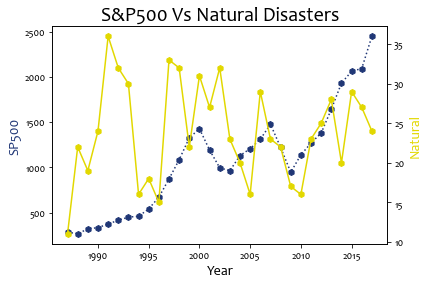

In [92]:
#Create a linechart to visualize overtime changes between Natural Disasters vs SP500
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(new_merged['Year'], new_merged['SP500'], color="#203776", marker="h",linestyle='dotted')
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("SP500",color="#203776",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(new_merged['Year'], new_merged['Natural'],color="#E2D800",marker="h")
ax2.set_ylabel("Natural",color="#E2D800",fontsize=14)
plt.title('S&P500 Vs Natural Disasters',fontsize=20)
plt.rcParams["font.family"] = "candara"
plt.show()

# save file
fig.savefig('linechart_natural.png',dpi=300)

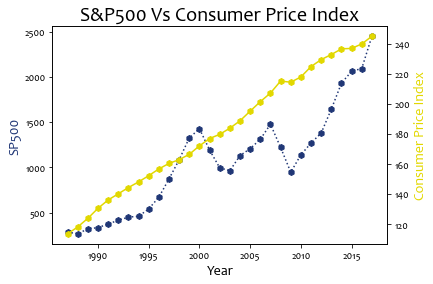

In [91]:
#Create a linechart to visualize overtime changes between CPI vs SP500
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(new_merged['Year'], new_merged['SP500'], color="#203776", marker="h",linestyle='dotted')
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("SP500",color="#203776",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(new_merged['Year'], new_merged['Consumer Price Index'],color="#E2D800",marker="h")
ax2.set_ylabel("Consumer Price Index",color="#E2D800",fontsize=14)
plt.title('S&P500 Vs Consumer Price Index',fontsize=20)
plt.rcParams["font.family"] = "candara"
plt.show()

# save file
fig.savefig('linechart_CPI.png',dpi=300)